In [1]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import pickle

2022-12-03 21:16:47.172190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 21:16:50.287307: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-12-03 21:16:50.287433: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 21:17:10.726998: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object

In [63]:
#read modified data
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

#read modified data
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

In [64]:
X.shape

(24946, 100, 100)

In [65]:
y.shape

(24946,)

In [66]:
X[0]

array([[205, 200, 204, ..., 140, 145, 121],
       [193, 201, 207, ..., 131, 126, 111],
       [198, 192, 206, ...,  97,  98,  96],
       ...,
       [212, 215, 207, ..., 145, 155, 152],
       [232, 227, 225, ..., 127, 140, 127],
       [219, 222, 219, ..., 101, 117,  94]], dtype=uint8)

In [67]:
X = X/255.0
X[0]

array([[0.80392157, 0.78431373, 0.8       , ..., 0.54901961, 0.56862745,
        0.4745098 ],
       [0.75686275, 0.78823529, 0.81176471, ..., 0.51372549, 0.49411765,
        0.43529412],
       [0.77647059, 0.75294118, 0.80784314, ..., 0.38039216, 0.38431373,
        0.37647059],
       ...,
       [0.83137255, 0.84313725, 0.81176471, ..., 0.56862745, 0.60784314,
        0.59607843],
       [0.90980392, 0.89019608, 0.88235294, ..., 0.49803922, 0.54901961,
        0.49803922],
       [0.85882353, 0.87058824, 0.85882353, ..., 0.39607843, 0.45882353,
        0.36862745]])

1


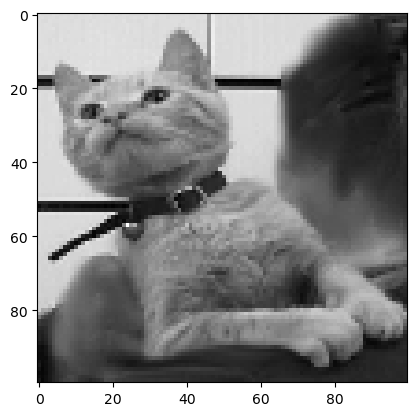

In [68]:
index = 3548
plt.imshow(X[index], cmap='gray')
print(y[index])

In [69]:
# model arch
model = tf.keras.models.Sequential()



# Add convolutions and max pooling
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100,1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 10, 10, 64)     

In [71]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [72]:
model.fit(X, y, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
702/702 [==============================] - 64s 88ms/step - loss: 0.5851 - accuracy: 0.6798 - val_loss: 0.5117 - val_accuracy: 0.7455
Epoch 2/3
702/702 [==============================] - 65s 92ms/step - loss: 0.4668 - accuracy: 0.7765 - val_loss: 0.4939 - val_accuracy: 0.7615
Epoch 3/3
702/702 [==============================] - 69s 98ms/step - loss: 0.4081 - accuracy: 0.8120 - val_loss: 0.4403 - val_accuracy: 0.8008
